In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
Data=pd.read_excel("amazon.xlsx",header = 0,index_col="date",na_values=0)
df=Data.copy()
df.dropna(inplace=True)
df=df[df['number']>10]
state=df['state'].unique()

In [30]:
df['month'].replace({'Janeiro' : 'Jan', 'Fevereiro' : 'Feb', 'Março' : 'March',
                    'Abril' : 'Apr', 'Maio' : 'May', 'Junho' : 'June', 
                     'Julho' : 'July', 'Agosto' : 'Aug', 'Setembro' : 'Sep',
                     'Outubro' : 'Oct', 'Novembro' : 'Nov', 'Dezembro' : 'Dec'
                    }, inplace = True)
df['month_year'] = pd.to_datetime(df['month'] + '.' + df['year'].astype('str'))
df.head()

,year,state,month,number,month_year
date,,,,,
2005-01-01,2005,Acre,Jan,12.0,2005-01-01
2016-01-01,2016,Acre,Jan,12.0,2016-01-01
2000-01-01,2000,Acre,March,11.0,2000-03-01
2013-01-01,2013,Acre,Apr,19.0,2013-04-01
2016-01-01,2016,Acre,May,21.0,2016-05-01


In [31]:
group_by_state = df .groupby('state', as_index = False).agg({'number' : 'sum'}).sort_values('number', ascending = False,inplace=False).reset_index().drop('index', axis = 1)
tot_sum=int(group_by_state['number'].sum())
print(tot_sum)
group_by_state.head()

691635


,state,number
0,Mato Grosso,95819.749
1,Paraiba,52027.000
2,Sao Paulo,51103.000
3,Bahia,44547.000
4,Rio,44292.000


In [32]:
grp_stt=group_by_state['state'].to_list()
grp_sum=group_by_state['number'].to_list()

In [33]:
months = df.month.unique()
months_num = np.arange(1,13)

In [34]:
months_transform = {mon:mon_num for mon, mon_num in zip(months, months_num)}
df['month_num'] = df['month'].map(months_transform)

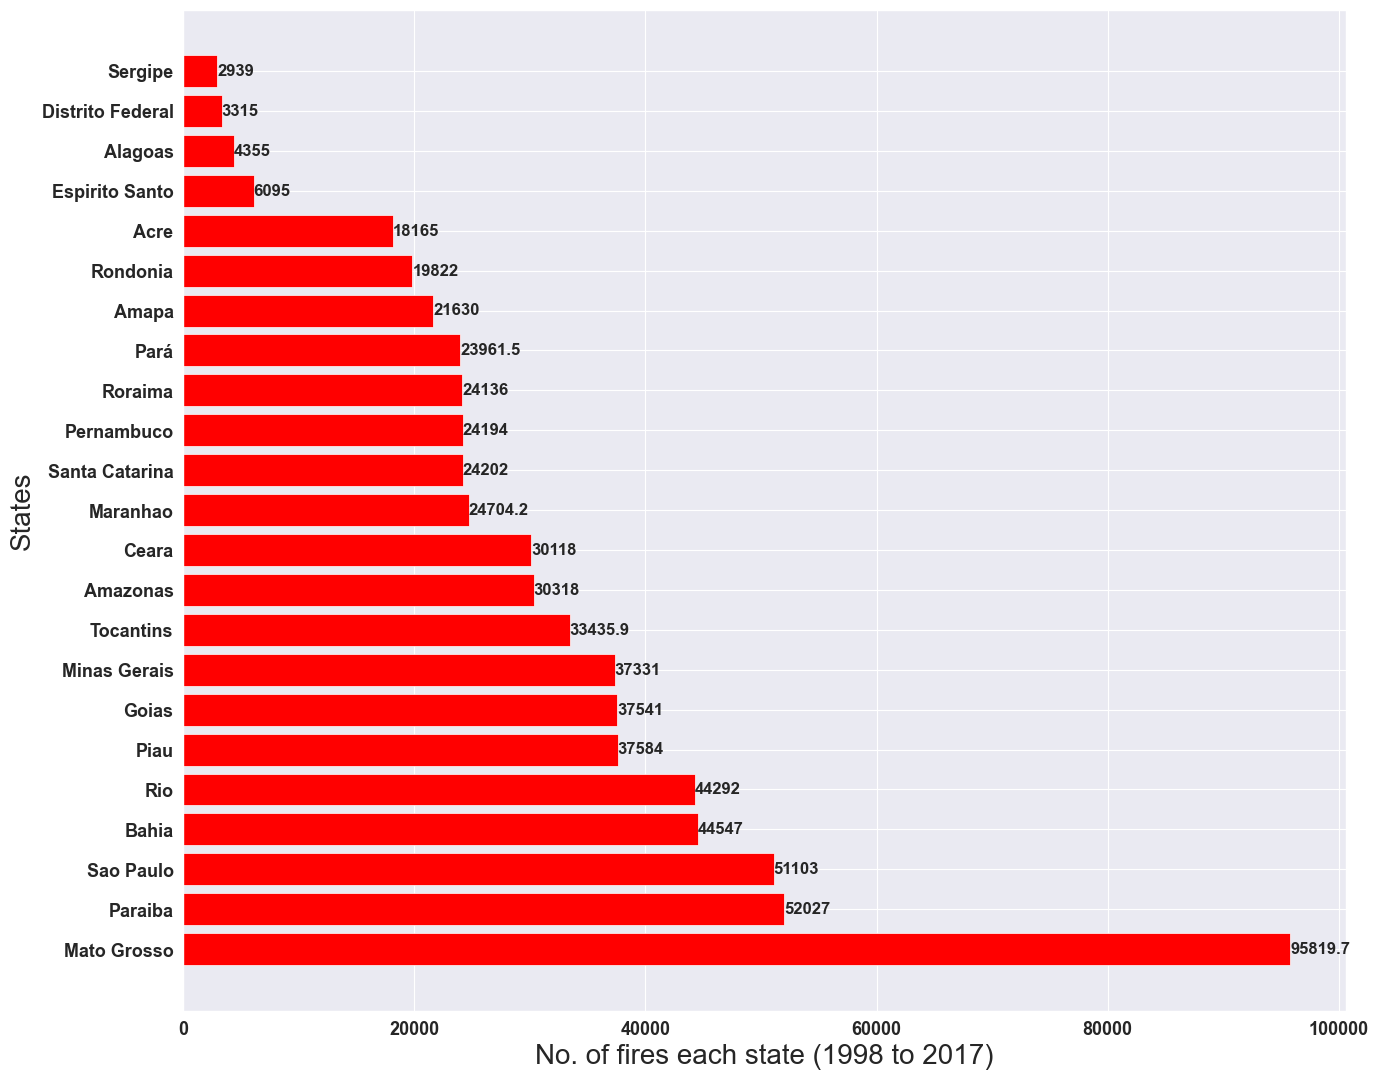

In [35]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(15,13))
plt.barh(grp_stt,grp_sum,color='red')
plt.ylabel('States',fontsize=20)
plt.yticks(size=13,weight="bold")
plt.xlabel("No. of fires each state (1998 to 2017)",size=20)
plt.xticks(size=13,weight="bold")
ax.bar_label(ax.containers[0],weight="bold",size=12)
plt.style.use('ggplot')
plt.show()

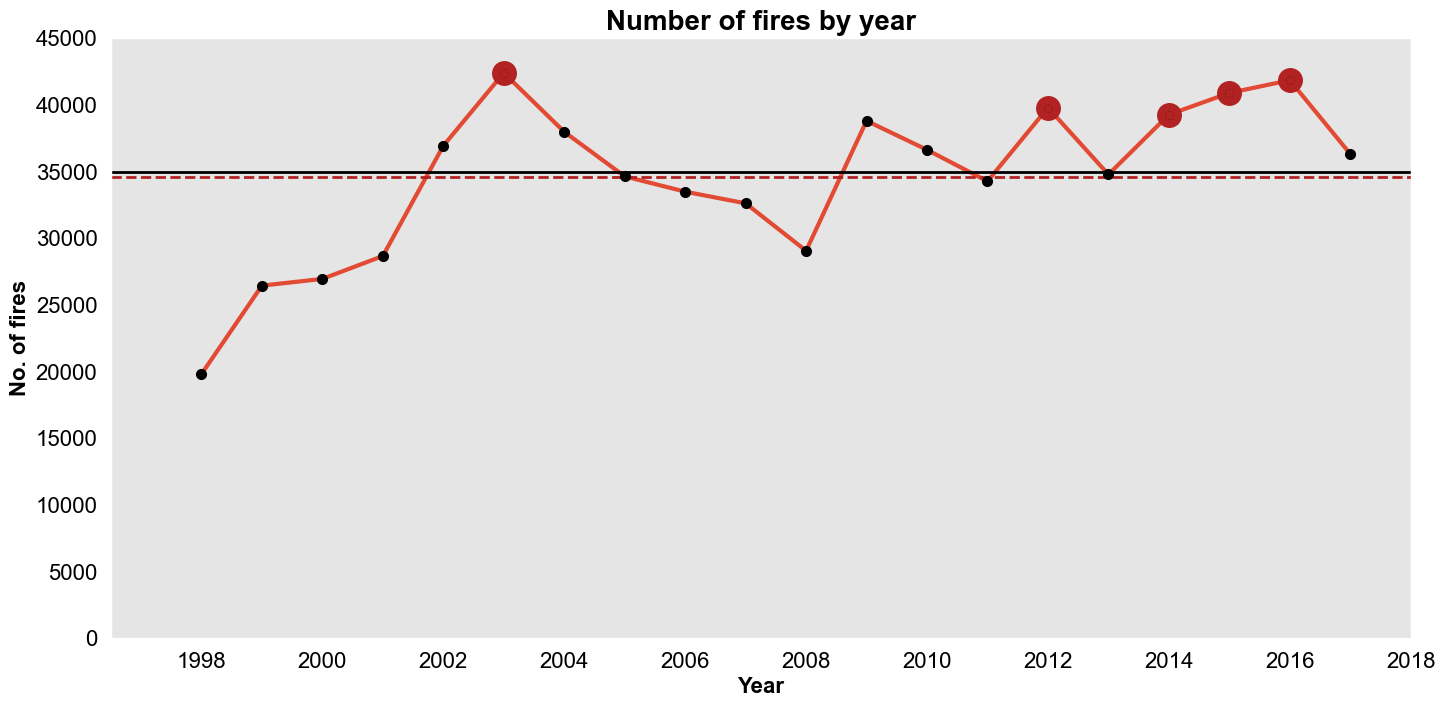

In [36]:
# calculation for grouping by year

group_by_year = df.groupby('year', as_index = False).agg({'number' : 'sum'}).reset_index().drop('index', axis = 1)

# viz

fig = plt.figure(figsize = (13, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.lineplot(x = group_by_year['year'], y = group_by_year['number'], lw = 3)
plt.scatter(x = group_by_year['year'] , y = group_by_year['number'], color = 'black', zorder = 3, lw = 2)

# Scatter plt for five major states where fire is more than avg.

major_five_stts=group_by_year[['year','number']].nlargest(5,columns='number').sort_values(by='number',ascending=True)
x_year=major_five_stts['year'].to_list()
y_number=major_five_stts['number'].to_list()
plt.scatter(x =x_year  , y =y_number , color = 'firebrick', zorder = 3, lw = 12)
plt.axhline(y = group_by_year['number'].mean(), color = 'firebrick', ls = '--', lw = 2,label='')
plt.axhline(y = 35000, color = 'k', ls = '-', lw = 2,label='')

# ticks

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_xlim(1996.5, 2018)
plt.yticks(range(0, 45001, 5000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# labels

plt.xlabel('Year', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('No. of fires', color = 'black', fontsize = 16, fontweight = 'bold')

# title

plt.title('Number of fires by year', color = 'black', fontsize = 20,
fontweight = 'bold')
plt.grid(False)
plt.show()

In [37]:
latitude={
    'Acre':-9.02,'Alagoas':-9.57,'Amapa':02.05,'Amazonas':-5.00 ,'Bahia':-12.00,'Ceara':-5.00,
          
          'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
          
          ,'Minas Gerais':-18.50,'Para':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
          'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
         'Tocantins':-10.00
         }

longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Pará':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
}
df['latitude'] = df['state'].map(latitude)
df['longitude'] = df['state'].map(longitude)

In [41]:
# calculations
by_state_2003 = df \
    .query('year == 2003') \
    .groupby('state', as_index = False) \
    .agg({'number' : 'sum'}) \
    .sort_values('number', ascending = False)
by_state_2003['latitude'] = by_state_2003['state'].map(latitude)
by_state_2003['longitude'] = by_state_2003['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= by_state_2003, scope='south america',lat = 'latitude',lon = 'longitude',
                     size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig.update_layout(title = dict(
    text='Fires in 2003 by state',
    x=0.2,
    font=dict(
        color='black',
        size=24)))
fig.show()